In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv('data_set_to_be_used')
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [3]:
# Remove the unwanted column 
df.drop(columns=['Serial No.'],inplace=True)

In [4]:
# Describing the data 
df.describe()

GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.63000  
50%      8.560000    1.000000           0.72000  
75%      9.040000    1.000000           0.82000  
max      9.920000    1.000000           0.97000

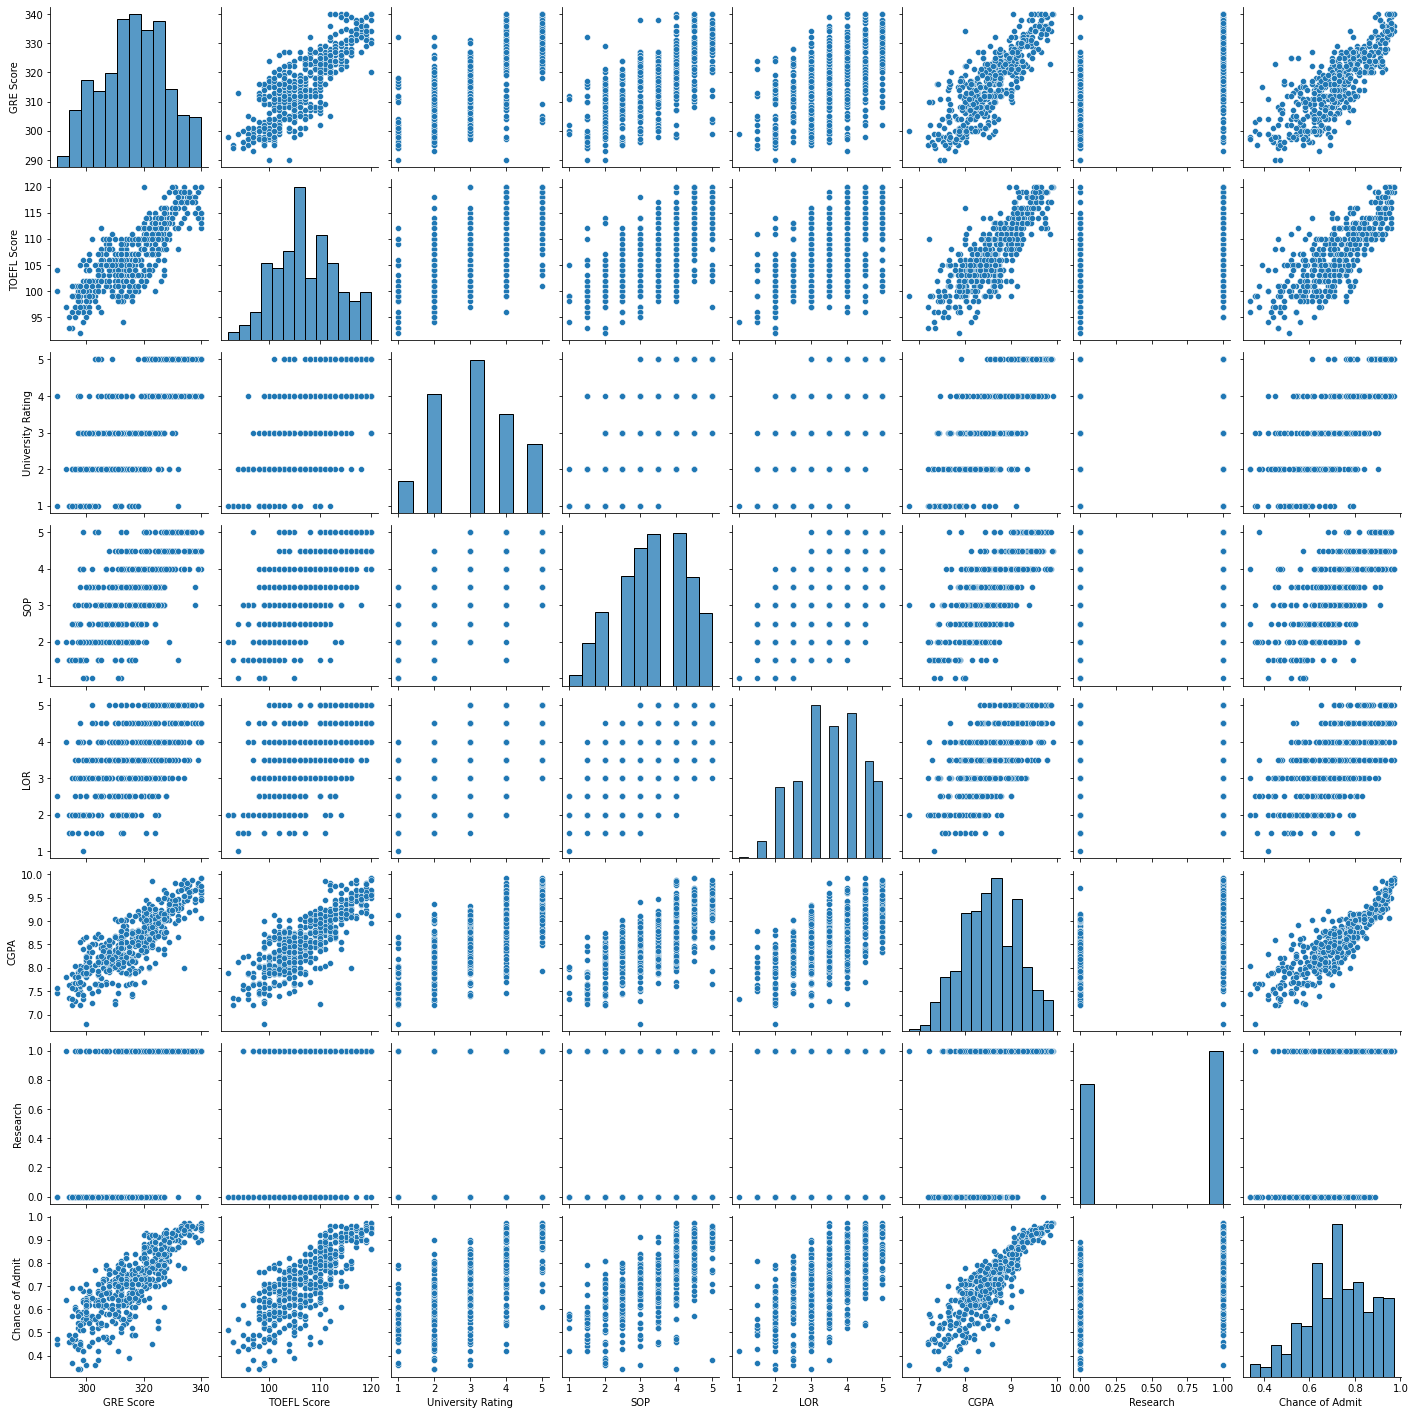

In [5]:
# Basic plot
sns.pairplot(df)

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

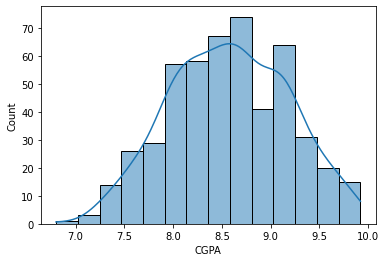

In [6]:
# Distribution of one column
sns.histplot(df['CGPA'],kde=True)

<AxesSubplot:>

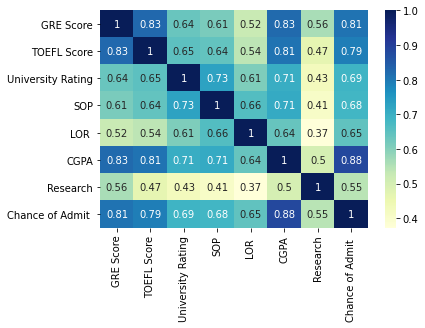

In [7]:
# To find the correlation 
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [8]:
# To view the columns
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
# Split the data into two sets Train and Test 

X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]

y = df['Chance of Admit ']

In [10]:
# To create a train_test_split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [11]:
# To create a Linear Regression Model 
lm = LinearRegression()

In [12]:
# To make the data fit 
a = lm.fit(X_train,y_train)
print(a)

LinearRegression()


In [13]:
# To print the intercept and coefficient for the model 
print('\n')
print('The Intercept of the model is: ',lm.intercept_)
print('\n')
print('The Coefficient of the model is:' + '\n',lm.coef_)



The Intercept of the model is:  -1.2002505696899464


The Coefficient of the model is:
 [0.00145221 0.00302388 0.00809642 0.00672185 0.01318406 0.12002891
 0.02477235]


In [14]:
# Create a dataframe with respect to X_train 
new_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(new_df)

                   Coefficient
GRE Score             0.001452
TOEFL Score           0.003024
University Rating     0.008096
SOP                   0.006722
LOR                   0.013184
CGPA                  0.120029
Research              0.024772


<AxesSubplot:xlabel='Chance of Admit ', ylabel='Count'>

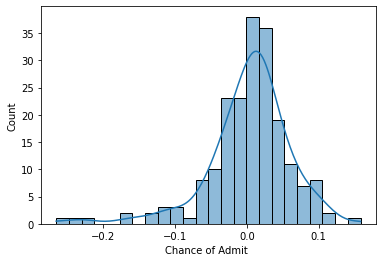

In [15]:
# To predict the model 
pre = lm.predict(X_test)

# To plot the predicted data and the test data 
sns.histplot((y_test-pre),kde=True)

In [16]:
# To print the Regression Evaluation Metrics

# To print the Mean Absolute Error Method 
Mae = metrics.mean_absolute_error(y_test,pre)
print("Mean Absolute Error of our dataset is (In percentage):",(Mae.round(2)*100))

print('\n')
# To print the Mean Square Error Method 
Mse = metrics.mean_squared_error(y_test,pre)
print("Mean Square Error of our dataset is (In percentage):",(Mse.round(2)*100))

print('\n')
# To print the Root Mean Square Error Method
Rsm = np.sqrt(metrics.mean_squared_error(y_test,pre))
print('Root Mean Square Error of our dataset is (In percentage):',(Rsm.round(2)*100))

Mean Absolute Error of our dataset is (In percentage): 4.0


Mean Square Error of our dataset is (In percentage): 0.0


Root Mean Square Error of our dataset is (In percentage): 6.0


In [ ]:
############################################################# End #########################################################################